**Import Statement**

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import export_graphviz
from scipy import misc
%matplotlib inline
import hdbscan
import copy
from IPython.display import Markdown, display
#For displaying titles
def printmrdwn(string):
    display(Markdown(string))

**Accessing Datasets and Preprocessing**

       Sector_score      PARA_A     Score_A      Risk_A       PARA_B  \
count    776.000000  776.000000  776.000000  776.000000   776.000000   
mean      20.184536    2.450194    0.351289    1.351029    10.799988   
std       24.319017    5.678870    0.174055    3.440447    50.083624   
min        1.850000    0.000000    0.200000    0.000000     0.000000   
25%        2.370000    0.210000    0.200000    0.042000     0.000000   
50%        3.890000    0.875000    0.200000    0.175000     0.405000   
75%       55.570000    2.480000    0.600000    1.488000     4.160000   
max       59.850000   85.000000    0.600000   51.000000  1264.630000   

          Score_B      Risk_B        TOTAL     numbers   Score_B.1  \
count  776.000000  776.000000   776.000000  776.000000  776.000000   
mean     0.313144    6.334008    13.218481    5.067655    0.223711   
std      0.169804   30.072845    51.312829    0.264449    0.080352   
min      0.200000    0.000000     0.000000    5.000000    0.200000   
2

Data Distribution

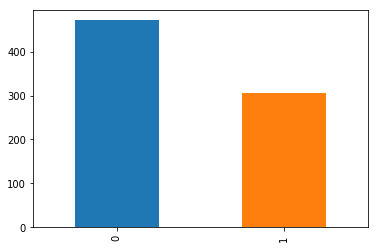

Data Types

Sector_score      float64
LOCATION_ID         int32
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object


Audit Dataset

     Sector_score  LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
374          1.99           17    0.60      0.2   0.120    0.00      0.2   
491          2.34           37    0.00      0.2   0.000    0.00      0.2   
678         55.57           41    0.00      0.2   0.000    0.00      0.2   
719         55.57           18    0.00      0.2   0.000    0.00      0.2   
412          1.85            9   19.21      0.6  11.526    2.47      0.6   

     Risk_B  TOTAL  numbers     ...      PROB  RiSk_E  History  Prob  Risk_F  \
374   0.000   0.60      5.0     ...       0.2     0.4        0   0.2     0.0   
491   0.000   0.00      5.0     ...       0.2     0.4        0   0.2     0.0   
678   0.000   0.00      5.0     ...       0.2     0.4        0   0.2     0.0   
719   0.000   0.00      5.0     ...       0.2     0.4        0   0.2     0.0   
412   1.482  21.68      5.0     ...       0.2     1.2        0   0.2     0.0   

     Score  Inherent_Risk  CONTROL_RISK  Detection_Risk  Audit

Risk Column

374    0
491    0
678    0
719    0
412    1
Name: Risk, dtype: int64


In [2]:
import Preprocessed_DataSets as ds
dataset_data, dataset_target=ds.get_auditData()
feature_list=dataset_data.columns
#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(dataset_data, dataset_target, test_size=0.2, random_state=1)

**Random Forest from sklearn**
***************************************************************************

In [3]:
#Creating random forest object and training the forest with the training data
parent_RF=RandomForestClassifier(n_estimators=500,random_state=1)
parent_RF.fit(X_train,y_train)
#Decision trees in the random forest
#print(objRandom.estimators_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

**Visualize a decision tree in random forest**

C:\Users\Petrofac\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


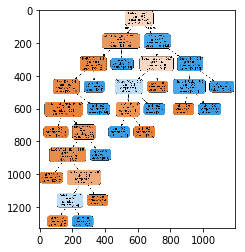

In [4]:
# Acessing a tree from random forest classifier
randomForestTree = parent_RF.estimators_[0]
# Export the image to a dot file
export_graphviz(randomForestTree, out_file = 'tree.dot', feature_names = feature_list, filled=True, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png');
file = misc.imread('tree.png')
plt.imshow(file)

**To Predict using each eastimator in random forest & Calculate weigth of each estimator in random forest**

In [5]:
#To create column title for each instance in dataframe
listColumn=[]
instanceNumbr ='inst'
for inst in range(len(X_train)):
    columnHeader=instanceNumbr+str(inst+1)
    listColumn.append(columnHeader)

#To append row title corresponding to each tree
listlabel=[]
decisionTree ='DTree'
for header in range(parent_RF.n_estimators):
    rowHeader=decisionTree+str(header)
    listlabel.append(rowHeader)

#To predict all the instance  in training dataset and to calculate weigth of each estimator. 
#Weigth for each estimator is calculated by dividing number of correct prediction by total number of instances
tree_weight=[]
listPredict=[]
for estimators in parent_RF.estimators_:
    estimators.classes_=parent_RF.classes_
    predictions=estimators.predict(X_train)
    #To store the weight of each tree
#     misclassified_samples = X_train[y_train != predictions]
#     incorrect_prediction,N=misclassified_samples.shape
#     print(incorrect_prediction)
    trueclassified_samples = X_train[y_train == predictions]
#     print(trueclassified_samples.shape[0])
#     print(X_train.shape)
    weight=(trueclassified_samples.shape[0])/(X_train.shape[0])
#     print(weight)
    tree_weight.append(weight)
    listPredict.append(predictions)
#     print(predictions)
    #print(estimators)
    
#print(listColumn)
#print(listlabel)
#print(listPredict)
#tListPredict=np.transpose(listPredict)
#print(tListPredict)
tree_weight_df=pd.DataFrame(tree_weight,columns=['Weight'])
dataset = pd.DataFrame(listPredict,columns=listColumn)
df2 = pd.DataFrame(listlabel)
FinalDataSet=pd.concat([df2,dataset,tree_weight_df],axis=1)
# tc = np.transpose(clusterSet)
# pd.concat([df2,df1],axis=1)
# print(tc.head())
# tc1= tc.drop(0, axis = 1)
# print(clusterSet)
print(FinalDataSet)
N,M=FinalDataSet.shape
print(N,M)

            0  inst1  inst2  inst3  inst4  inst5  inst6  inst7  inst8  inst9  \
0      DTree0      0      0      0      1      0      1      0      0      0   
1      DTree1      0      0      0      1      0      1      0      0      0   
2      DTree2      0      0      0      1      0      1      0      0      0   
3      DTree3      0      0      0      1      0      1      0      0      0   
4      DTree4      0      0      0      1      0      1      0      0      0   
5      DTree5      0      0      0      1      0      1      0      0      0   
6      DTree6      0      0      0      1      0      1      0      0      0   
7      DTree7      0      0      0      1      0      1      0      0      0   
8      DTree8      0      0      0      1      0      1      0      0      0   
9      DTree9      0      0      0      1      0      1      0      0      0   
10    DTree10      0      0      0      1      0      1      0      0      0   
11    DTree11      0      0      0      

**Distance Claculation -Simple mismatch compuation**
        

In [6]:
##Method to calculate simple mismatch distance between two trees (This calculation is done by comparing the predicted value of each decision tree)
def get_distance(tree_One,tree_Two):
    diff=0
    dimension=len(tree_One)
#     print(tree_One)
#     print(tree_Two)
    for inst in range(dimension):
        if(tree_One[inst]==tree_Two[inst]):
            diff=diff
        else:
            diff=diff+1  
            
    diff=int(round(diff))        
    return diff

**Method to calculate mismatch matrix without cosidering weigth of each estimator**

In [7]:
def simplemismatch_matrix(listPredict,estimator_no):
#     tree_nesteList=[[] for i in range(10)]
    diversity_matrix=np.zeros((estimator_no,estimator_no))
    # print(tree_nesteList)
    # print(diversity_matrix)
    for i in range(estimator_no):
        for j in range(estimator_no):
            distance=get_distance(listPredict[i],listPredict[j])
            diversity_matrix[i][j]=distance*distance
    #         print(diversity_matrix)
#     print(diversity_matrix)
#     diversity_matrix.shape
    return(diversity_matrix)

**Method to calculate weigthed mismatch matrix**

In [8]:
def weigthedmismatch_matrix(listPredict,estimator_no):
    # tree_nesteList=[[] for i in range(10)]
    diversity_matrix=np.zeros((estimator_no,estimator_no))
    # print(tree_nesteList)
    # print(diversity_matrix)
    for i in range(estimator_no):
        for j in range(estimator_no):
            distance_tree=get_distance(listPredict[i],listPredict[j])

            weigth_diff=abs(tree_weight[i]-tree_weight[j])
#             print(weigth_diff)
            diversity_matrix[i][j]=(distance_tree*weigth_diff)*(distance_tree*weigth_diff)
            print((distance_tree*weigth_diff)*(distance_tree*weigth_diff))

    #         print(diversity_matrix)
#     print(diversity_matrix)
    diversity_matrix.shape
    return(diversity_matrix)

**Clustering Algorithm Implementation**
*********************************************************

**Precomputed matrix for clustering**

In [ ]:
#Simple mismatch matrix for clustering
simpleprecomputed_matrix=simplemismatch_matrix(listPredict,N)
print(simpleprecomputed_matrix)
#Weigthed mismatch matrix for clustering
weigthedprecomputed_matrix=weigthedmismatch_matrix(listPredict,N)
print(weigthedprecomputed_matrix)

**To analyse the matrix and find the mean, median and quartiles of the ,atrix**

In [ ]:
#To analyse the data of  both the precomputed matrix
simpleprecomputed_matrixdf=pd.DataFrame(simpleprecomputed_matrix)
print(simpleprecomputed_matrixdf.describe())
weigthedprecomputed_matrixdf=pd.DataFrame(weigthedprecomputed_matrix)
print(weigthedprecomputed_matrixdf.describe())

**Applying HDBSCAN**

In [ ]:
#Clustering object for simple mismatch matrix
db_simple = hdbscan.HDBSCAN( metric='precomputed')
#Clustering object for weigthed mismatch matrix
db_weigthed = hdbscan.HDBSCAN( metric='precomputed')

In [ ]:
#Fit the cluster object with simple mismatch matrix
db_simple.fit(simpleprecomputed_matrix)
#Fit the cluster object with weigthed mismatch matrix
db_weigthed.fit(weigthedprecomputed_matrix)

In [ ]:
labels_simple = db_simple.labels_
prob=db_simple.probabilities_
labels_weigthed = db_weigthed.labels_

In [ ]:
db_simple.condensed_tree_.plot()

In [ ]:
db_simple.single_linkage_tree_.plot()

In [ ]:
labels_simple

In [ ]:
db_simple.probabilities_

In [ ]:
db_weigthed.condensed_tree_.plot(select_clusters=True,selection_palette=sns.color_palette('deep', 100))

In [ ]:
db_weigthed.single_linkage_tree_.plot()

In [ ]:
labels_weigthed

In [ ]:
db_weigthed.probabilities_

In [ ]:
simpleprecomputed_matrixdf['Clusters']=labels_simple
weigthedprecomputed_matrixdf['Clusters']=labels_weigthed
print(simpleprecomputed_matrixdf)
print(weigthedprecomputed_matrixdf)

In [ ]:
def plot_data(Dataset_name,X_data,y_target):
    model =TSNE(n_components=2,random_state=0,perplexity=10,n_iter=1000)
    tsne_data=model.fit_transform(X_data)
    tsne_datastack=np.vstack((tsne_data.T,y_target)).T
    tsne_df=pd.DataFrame(data=tsne_datastack,columns=("Dim_1","Dim_2","Cluster"))
    sn=sns.FacetGrid(tsne_df,hue="Cluster",size=7)
    sn.map(plt.scatter,'Dim_1','Dim_2',alpha=1, 
          edgecolor='white', linewidth=0.25, s=100).add_legend(title="Cluster")
    plt.axis('off')
    plt.title(Dataset_name)
    plt.show()

In [ ]:
plot_data("Clusters Obtained using simple mismatch distance",simpleprecomputed_matrix,labels_simple)
plot_data("Clusters Obtained using weigthed distance",weigthedprecomputed_matrix,labels_weigthed)

In [ ]:
print(weigthedprecomputed_matrixdf.head())
weigthedprecomputed_matrixdf[weigthedprecomputed_matrixdf['Clusters']==8.0]